In [1]:
#let’s import all the libraries that we need for this task and get started with reading the dataset and exploring some insights from the data:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.cluster import DBSCAN

import warnings
warnings.simplefilter('ignore')

df = pd.read_json('livedata.json')
df.head()

,id,timestamp,latitude,longitude
0,Ahmet,2020-07-04 15:35:30,13.148953,77.593651
1,Ahmet,2020-07-04 16:35:30,13.222397,77.652828
2,Fuat,2020-07-04 14:35:30,13.236507,77.693792
3,Cansu,2020-07-04 21:35:30,13.163716,77.562842
4,Murat,2020-07-04 22:35:30,13.232095,77.580273


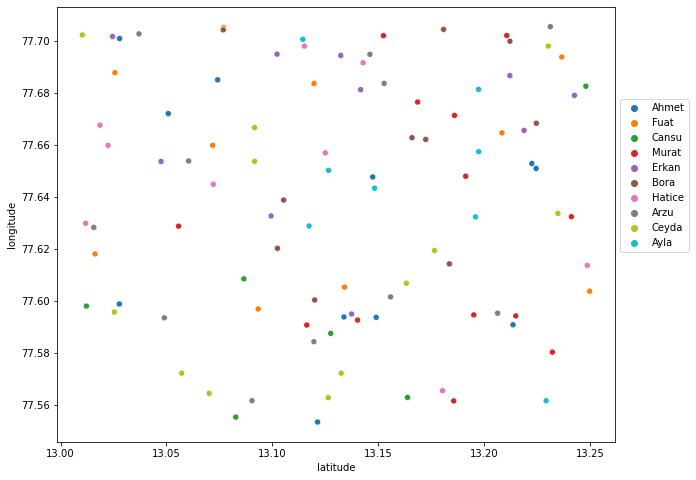

In [2]:
# Let’s analyze the dataset using the scatter plot showing the ids with their latitudes and longitudes on the x-axis and the Y-axis respectively:
plt.figure(figsize=(10,8))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor= [1, 0.8])
plt.show()

Creating a Model for Contact Tracing with Machine Learning
Now let’s create a model for contact tracing using the DBSCAN model. The function below will help us to create the DBSCAN model, using this model we will generate clusters, which will help identify infections by filtering the data in the clusters:

In [3]:
#epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
epsilon = 0.0036576 # a radial distance of 12 foot in kilometers
model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
# model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
df['cluster'] = model.labels_.tolist()


def get_infected_names(input_name):

    input_name_clusters = []
    infected_names = []
    
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])
    
    
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    return infected_names

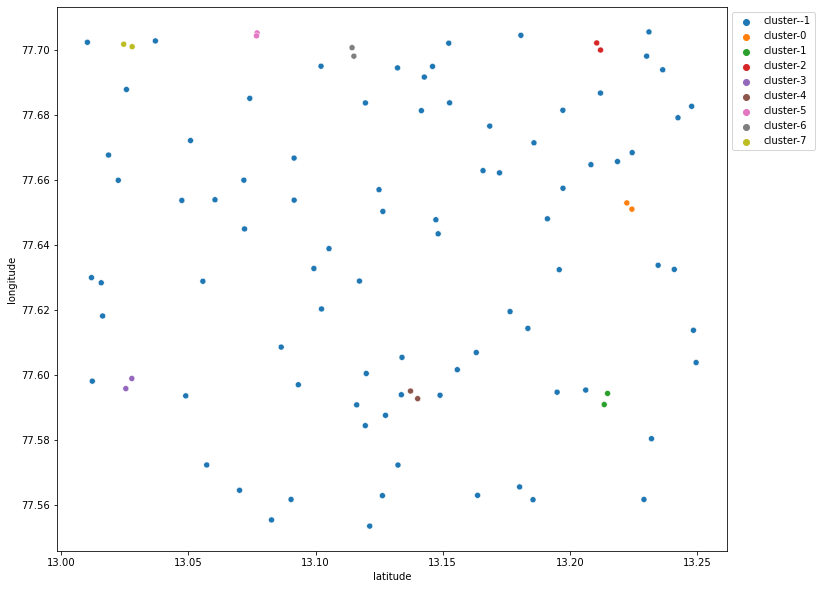

In [4]:
# let’s generate clusters using our model:
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(df['latitude'], df['longitude'], hue = ['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])
plt.show();

In [6]:
# To find people who may be infected by the patient, we’ll just call the get_infected_names function and enter a name from the dataset as a parameter:
print(get_infected_names("Erkan"))

['Murat', 'Ahmet']
